# Soft Sensor to inference Chlorophyll concentration in water

Chlorophyll-A concentration is a wide used index to estimate the eutrophication level in water. However, taking this measure in real time can be difficult and costly. Thus, in this project We intend to evaluate the possibility of inferecing Chlorophyll-A concentration through other variables that are measured simpler. This dataset were provided by SABESP, a brazilian water supplier company, in Its own website. It refers to a reservoir sited in 
Guarapiranga - SP

## Data Acquisition

In [1]:
MyData <- read.csv(file="chlorophyll_concentration.csv", header=TRUE, sep=";", na = "NA") # Reading a csv file in which We have our variables

Warning message in file(file, "rt"):
“cannot open file 'chlorophyll_concentration.csv': No such file or directory”

ERROR: Error in file(file, "rt"): cannot open the connection


## Data Cleaning, Manipulation and Exploration

In [2]:
# Changing the column names
colnames(MyData) <- c("Condutivity", "DO", "pH", "REDOX potential", "profundity", "Temperature", "Turbidity", "Chlorophyll")

In [3]:
# Let's take a look in the structure of our dataset
str(MyData) 

'data.frame':	512 obs. of  8 variables:
 $ Condutivity    : num  122 121 121 120 121 ...
 $ DO             : num  8.32 5.67 5.33 7.61 7.96 7.9 7.94 8.48 8.15 6.79 ...
 $ pH             : num  7.47 6.9 6.79 7.1 7.12 7.31 7.36 7.65 7.49 7.15 ...
 $ REDOX potential: num  198 231 229 229 209 ...
 $ profundity     : num  0.37 0.4 0.42 0.41 0.39 0.4 0.35 0.35 0.4 0.4 ...
 $ Temperature    : num  20.6 20 19.6 19.5 19.7 ...
 $ Turbidity      : num  6.98 4.65 3.94 5.2 4.76 5.47 5.94 7.7 8.42 5.75 ...
 $ Chlorophyll    : num  60 30.6 17.1 38 24.4 ...


In [4]:
head(MyData)

Condutivity,DO,pH,REDOX potential,profundity,Temperature,Turbidity,Chlorophyll
121.73,8.32,7.47,198.04,0.37,20.55,6.98,59.97
121.29,5.67,6.90,231.30,0.40,19.98,4.65,30.59
120.77,5.33,6.79,229.20,0.42,19.61,3.94,17.06
119.50,7.61,7.10,228.61,0.41,19.47,5.20,38.00
121.17,7.96,7.12,208.77,0.39,19.73,4.76,24.39
120.21,7.90,7.31,224.04,0.40,19.46,5.47,21.21


In [5]:
summary(MyData)

  Condutivity          DO               pH        REDOX potential 
 Min.   :115.1   Min.   : 1.930   Min.   :6.400   Min.   : 41.72  
 1st Qu.:134.8   1st Qu.: 6.077   1st Qu.:7.090   1st Qu.:116.15  
 Median :142.3   Median : 7.110   Median :7.525   Median :139.90  
 Mean   :142.7   Mean   : 7.130   Mean   :7.676   Mean   :170.20  
 3rd Qu.:148.6   3rd Qu.: 8.220   3rd Qu.:8.193   3rd Qu.:182.16  
 Max.   :180.6   Max.   :12.080   Max.   :9.920   Max.   :511.70  
   profundity      Temperature      Turbidity        Chlorophyll   
 Min.   :0.1000   Min.   :17.22   Min.   :  0.130   Min.   : 2.70  
 1st Qu.:0.2800   1st Qu.:20.72   1st Qu.:  1.835   1st Qu.:16.52  
 Median :0.3000   Median :23.52   Median :  2.940   Median :26.05  
 Mean   :0.3234   Mean   :23.13   Mean   : 10.802   Mean   :27.96  
 3rd Qu.:0.4000   3rd Qu.:25.02   3rd Qu.:  4.122   3rd Qu.:35.28  
 Max.   :0.6000   Max.   :29.64   Max.   :738.960   Max.   :83.30  

In [6]:
# Seemingly our dataset is already in a tidy format
# this means that We have an observation per row and there is a variable in each column.

### Missing Values Treatment

In [7]:
# We have 8 variables, including our target, and all of them are nummeric. Besides, We have 512 observations
# Let's observe if there are missing values 
colSums(is.na(MyData))

Condutivity              DO              pH REDOX potential      profundity 
              0               0               0               0               0 
    Temperature       Turbidity     Chlorophyll 
              0               0               0

In [8]:
# Fortunately, our dataset does not have any missing value, what is really good.
# Otherwise, We could use some imputation techniques, such as K-nearest-neighboors 
# or Multivariate Imputation by Chained Equations, which would be appropriate in case We had categorical 
# variables as missing values

### Outlier Treatment

In [9]:
# Outilers can drastically bias/change the fit estimates and predictions. So It's important to identify them.
# Once We are dealing with a multivariate dataset, Cook's distance could be a good choice to identify outliers in our data
# Let's firstly perform a multiple linear regression and then apply the cook's distance method to the fitted model

In [10]:
model <- lm(Chlorophyll ~ ., data=MyData) # Linear regression to predict Chloropyll concentration
model


Call:
lm(formula = Chlorophyll ~ ., data = MyData)

Coefficients:
      (Intercept)        Condutivity                 DO                 pH  
        -46.14661            0.44271            2.30716            5.66494  
`REDOX potential`         profundity        Temperature          Turbidity  
          0.01033          -33.44861           -1.73613            0.02038  


In [11]:
outlier_cooks <- cooks.distance(model)
head(outlier_cooks,10) # 
# Cook's distance is a measurement that indicates how much the observations influentiates the model
# In general, We can consider as influential those observations that have cook's distance >= 4 times the mean 

1            2            3            4            5            6 
1.992717e-02 3.344466e-03 3.051934e-04 6.084237e-03 1.854991e-04 9.638598e-06 
           7            8            9           10 
1.054509e-03 4.615667e-06 6.413985e-04 1.727696e-04

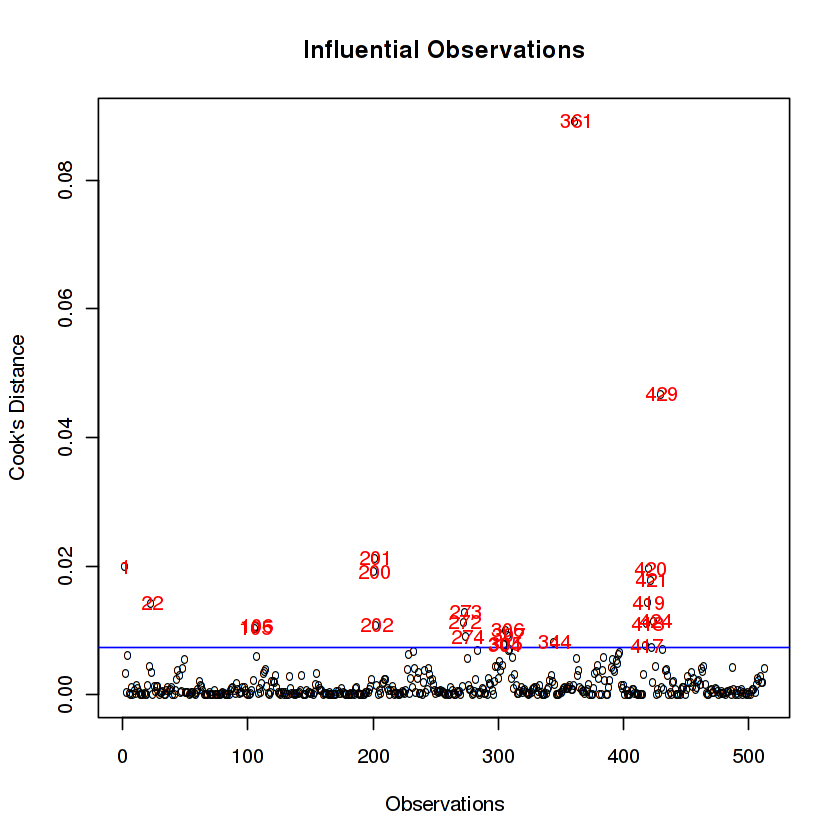

In [12]:
plot(outlier_cooks, pch="o", cex=0.8,  xlab = "Observations", ylab = "Cook's Distance", main="Influential Observations")  # plot cook's distance

abline(h = 4*mean(outlier_cooks, na.rm=T), col="blue")  # horizontal line as cutoff 

text(x=1:length(outlier_cooks)+1, y=outlier_cooks, labels=ifelse(outlier_cooks>4*mean(outlier_cooks, na.rm=T),
                                                                 names(outlier_cooks),""), col="red")

In [13]:
# Let's try to understand why these observations were classified as outliers
Outliers <- as.numeric(names(outlier_cooks)[(outlier_cooks > 4*mean(outlier_cooks, na.rm=T))]) 
length(Outliers)
Outliers

[1] 23

[1]   1  22 105 106 200 201 202 272 273 274 304 305 306 307 344 361 417 418 419
[20] 420 421 424 429

In [14]:
library("dplyr")
MyData[Outliers,]  %>%  select(`REDOX potential`,Turbidity, Chlorophyll)  # Selecting the columns of the data frame

# The condutivity, DO, Temperature, profundity and pH do not vary too much in these observations, so let's focus on the
# REDOX potential, turbidity and chlorophyll columns

# So, We have 23 observations considered Outliers, which represents about 4.5% of the data.
# We could delete these observations, as simple as that, but We must be cautious.
# The observations 1, 22, 304,305,306,307, 361, 424 and 429 presents high Chlorophyll concentrations
# The observations 417 to 421 presents high REDOX potentials
# The observations 22, 200, 201, 202, 272, 273, 274, 304, 305, 306, 307, 344, 361, 417, 418, 419, 420, 421 have 
# low turbidity levels
# The observation number 429 has a low REDOX potential

# We can analyse from diverse perspectives about what observation should have been deleted. It's our role to test the combinations


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



,REDOX potential,Turbidity,Chlorophyll
1,198.04,6.98,59.97
22,126.44,3.92,51.13
105,167.92,6.44,17.47
106,160.76,6.65,16.84
200,89.07,3.11,15.88
201,90.72,2.57,7.17
202,111.44,2.01,2.91
272,118.31,2.13,15.51
273,110.63,3.78,19.39
274,117.03,3.81,14.51


In [15]:
# In real life, It's interesting for water supplier companies to know when the Chlorophyll level rises apart from the mean
# so that We can not delete  these high values aconsidering them as outliers. We should keep them, instead. For those values
# lower than the mean, We should consider that It's also important to know when the Chlorophyll level decays, so that the water
# is appropriate to use. An analogous reasoning is taken for those observations with high or low levels of turbidity.
# But the observation 361 for turbidity can really make the model to be biased, so let's drop It.
water_quality <- MyData[-361,]

### Feature Selection

In [16]:
# let's begin by identifying low variance in the predictors
library(caret)

# get indices of data.frame columns (pixels) with low variance
badCols <- nearZeroVar(water_quality)
length(badCols)
# Once the length is 0, It means that all variables in the dataframe have a considerable variance

Loading required package: lattice
Loading required package: ggplot2


[1] 0

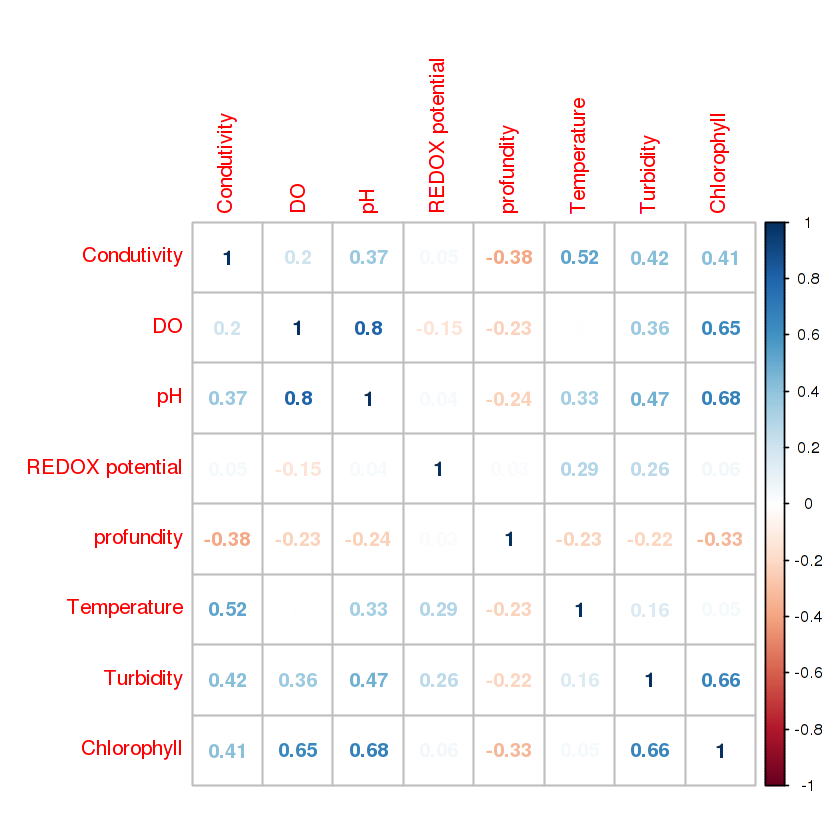

In [17]:
# Now We can use a correlation plot to identify those variables that have high correlation with our target.
cor_matrix <- cor(water_quality, method = "spearman") # Kendall methods was use because most of variables are non normaly distributed

library(corrplot)
corrplot(cor_matrix, method = "number") # Creating a plot with the correlation values obtained from the previous test

In [18]:
# We see that the target (Chlorophyll) has the higher correlations with the Dissolved Oxygen (DO), pH and Turbidity. In practise,
# This makes sense and We can assume that there is also a causation relationship between them.
# Keep these 3 variables is initially a hint. Now let's consider the Boruta test to see if this thought is reasonable

Loading required package: ranger
After 10 iterations, +7.5 secs: 
 confirmed 7 attributes: Condutivity, DO, pH, profundity, `REDOX potential` and 2 more;
 no more attributes left.



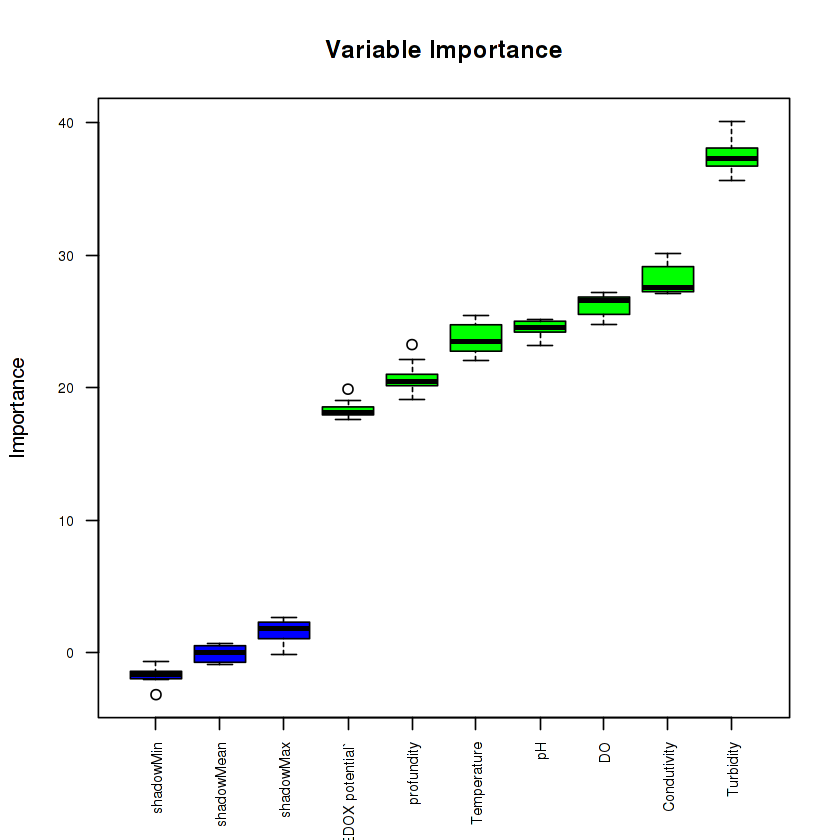

In [19]:
library(Boruta)
# Decide if a variable is important or not using Boruta
boruta_output <- Boruta(Chlorophyll ~ ., data=water_quality, doTrace=5)  # perform Boruta search

boruta_signif <- names(boruta_output$finalDecision[boruta_output$finalDecision %in% c("Confirmed", "Tentative")])  # collect Confirmed and Tentative variables
plot(boruta_output, cex.axis=.7, las=2, xlab="", main="Variable Importance")  # plot variable importance

In [20]:
# We see from the graphic above that initially none of the variables should be desconsidered in the model
# But The variables Profundity and REDOX potential showed has shown to be the less influential variables in the model
# Note that DO and pH are strongly correlated with a score of 0.8. Then, just one them is necessary to the model. Let's pick up
# DO because We believe there is more causation between this variable and the target
# Let's also drop Temperature, that scored only 0.05

In [21]:
water_quality_full <- water_quality # Creating the first data frame having all columns

water_quality_reduced <- water_quality  %>%  select(pH, DO, Condutivity, Turbidity, Chlorophyll) # Creating a new data frame 
# without the REDOX potential and profundity columns

###  Normalization and Splitting 

In [22]:
# Last but not least, let's scale our data and split It into training set and test set
# Let's create a function to do It: The function will receive the dataset and a number from 0 to 1 

In [23]:
scale_split <- function(dataset,rate) {
    #This function takes a dataframe and a value in (%)
    # Scale the data from 0 to 1  and divide It into a training set and a test set
    
  library("dplyr")  # Import the library
    
    
  samplesize = 0.75 * nrow(dataset) %>% 
  round() # rate% of the dataset for training the model and (100-rate)% for evaluation

  index = nrow(dataset) %>% 
  seq_len() %>%
  sample( , size = samplesize )  # It generates a random vector of size = samplesize

  max = apply(dataset , 2 , max)  #calculates the maximum values of each column of the dataset
  min = apply(dataset, 2 , min) #calculates the minimum values of each column of the dataset

  scaled = as.data.frame(scale(dataset, center = min, scale = max - min))# Scale the data

  datatrain = dataset[ index, ] # Training set not scaled
  datatest = dataset[ -index, ] # Test set not scaled

  train_set = scaled[index , ] # Training set scaled
  test_set  = scaled[-index , ] # Test set  scaled

    return(list(train_set, test_set, datatrain, datatest))
}



In [43]:
water_quality_set <- scale_split(water_quality_reduced, 0.85)
class(water_quality_set) # It's a list as expected 

[1] "list"

In [44]:
# Recovering each dataframe from the water_quality_set list

train_set_reduced <-water_quality_set[[1]]
test_set_reduced <- water_quality_set[[2]]
real_train_reduced <- water_quality_set[[3]]
real_test_reduced <- water_quality_set[[4]] 


In [26]:
head(train_set_reduced,3)

,pH,DO,Condutivity,Turbidity,Chlorophyll
447,0.2301136,0.4275862,0.5560295,0.003063625,0.2052063
84,0.3409091,0.4147783,0.4339623,0.004686617,0.3158776
450,0.1704545,0.3438424,0.5102543,0.001550048,0.1802405


## Modelling

### Multiple Linear Regression

In [27]:
# Now let's move on to the modelling phase

In [28]:
# Let's try firstly to perform a linear regression to see if It's posible to inference Chlorophyll from pH, DO, Condutivity and
# Turbidity

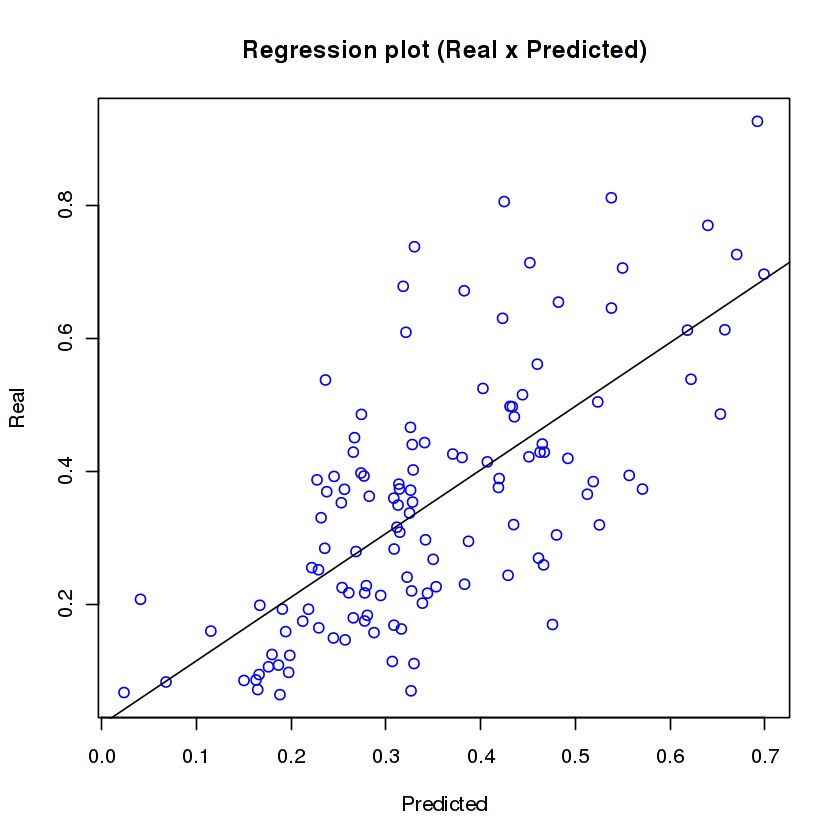

In [45]:
linear_model_reduced <- lm(Chlorophyll ~., data = train_set_reduced) # Multiple Linear Regression
linear_predicted_reduced <- predict(linear_model_reduced, test_set_reduced[,1:4]) # Predicting the values
plot(linear_predicted_reduced, test_set_reduced[,5], col = "blue",xlab = "Predicted", ylab = "Real", main = "Regression plot (Real x Predicted)")
abline(lm(test_set_reduced[,5] ~ linear_predicted_reduced))

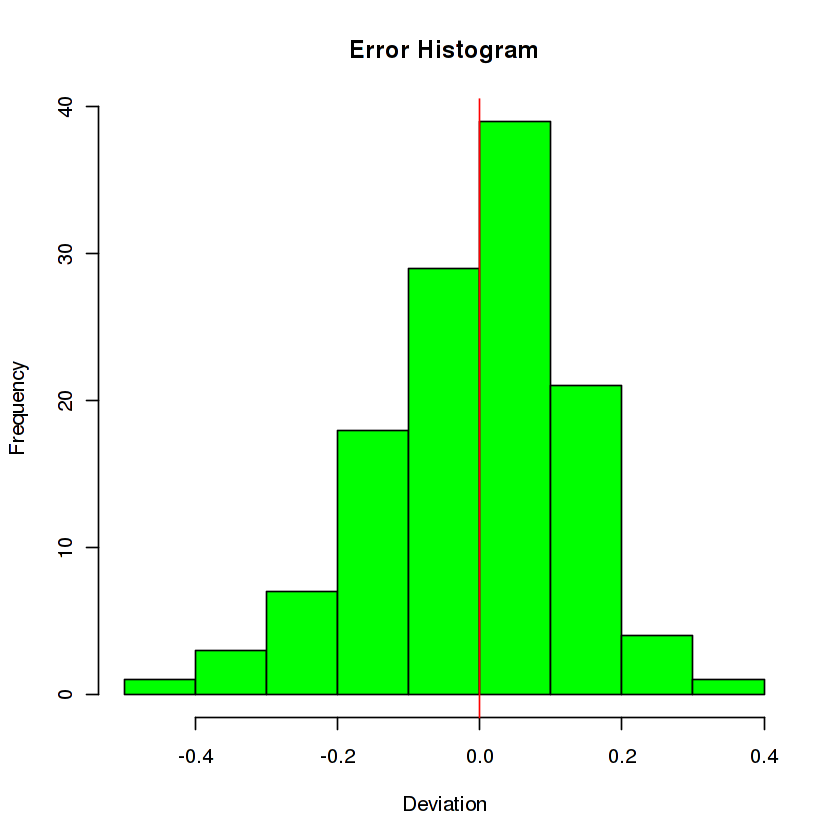

In [46]:
# Let's plot a histogram to see the distribution of the deviations
hist(linear_predicted_reduced -  test_set_reduced[,5], main = "Error Histogram", col = "green", xlab = "Deviation")
abline(v = 0, col = "red")

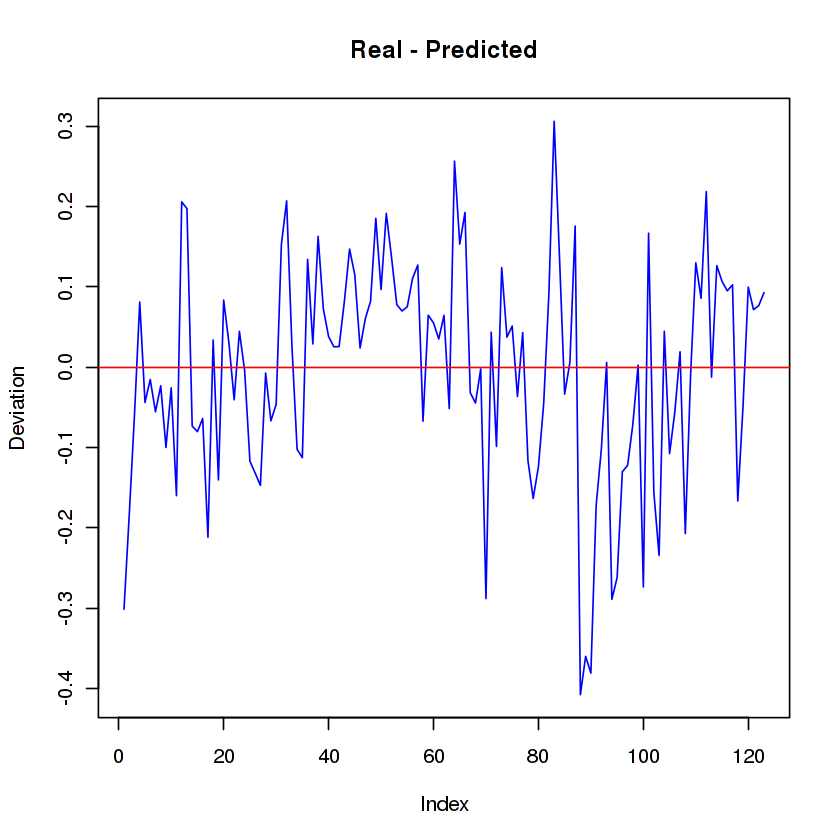

In [79]:
# Deviation plot
plot(linear_predicted_reduced -  test_set_reduced[,5], type = "l", col = "blue", xlab = "Index", ylab = "Deviation", main = "Real - Predicted")
abline(h = 0, col = "red")

In [47]:
# Pearson correlation between the real values and predicted values
corr_linear_model <- cor(test_set_reduced[,5],linear_predicted_reduced)
corr_linear_model

[1] 0.694698771

In [48]:
# That's not too bad, bu It can still improves a lot. But after testing a new model, let's see some other error metrics
performance <- function (Y, y) {
  
  #This functions takes Y, which are the real values and y which are the predicted values
  RMSE <-  (sum((Y - y)^2) / length(y)) ^ 0.5  #This is the Root Mean Squared Error
  MAPE <- sum(abs((Y-y)/Y))*(100)/length(Y) # This is the Mean Absolute Percentage Error
  SSE <- sum((Y - y)^2) # THis is the Sum of Squared Errors
  
  R <- cor(Y,y) #The same pearson's correlation
 
 return(data.frame(RMSE = RMSE,MAPE  =MAPE,SSE = SSE, R = R))

}

In [49]:
# Measuring the performance of the linear model 
errors_linear_model <- performance(test_set_reduced[,5],linear_predicted_reduced)
errors_linear_model

RMSE,MAPE,SSE,R
0.1373089782,42.09096628,2.319011927,0.694698771


### Multilayered Perceptron

In [34]:
# Maybe our dataset has non-linear relationship betweeen Its variables. So, let's perform now a regression using an
# Artificial Neural Network. This way, We'll be able to introduce non-linearity in the model and It may performs better

In [35]:
library("neuralnet") # importing the library


Attaching package: ‘neuralnet’

The following object is masked from ‘package:dplyr’:

    compute



In [70]:
neural_net_model <- neuralnet(Chlorophyll ~ pH + DO + Condutivity + Turbidity, data = train_set_reduced, hidden = c(10), threshold = 0.01,        
          stepmax = 1e+05, rep = 1, startweights = NULL, 
          learningrate.limit = NULL, 
          learningrate.factor = list(minus = 0.5, plus = 1.2), 
          learningrate=0.001, lifesign = "none", 
          lifesign.step = 5000, algorithm = "rprop+", 
          err.fct = "sse", act.fct = "tanh", 
          linear.output = TRUE, exclude = NULL, 
          constant.weights = NULL, likelihood = FALSE)
# Training the model with a MLP network, having one layer with x neurons, tanh activation function for the hidden layer and
# linear function for the output layer, SSE as function to minimize and resilient propagation without backtracking optimizing algorithm


In [75]:
yy <- compute(neural_net_model, test_set_reduced[,1:4])  # Predicting new values 
neural_predicted_reduced <- yy$net.result 

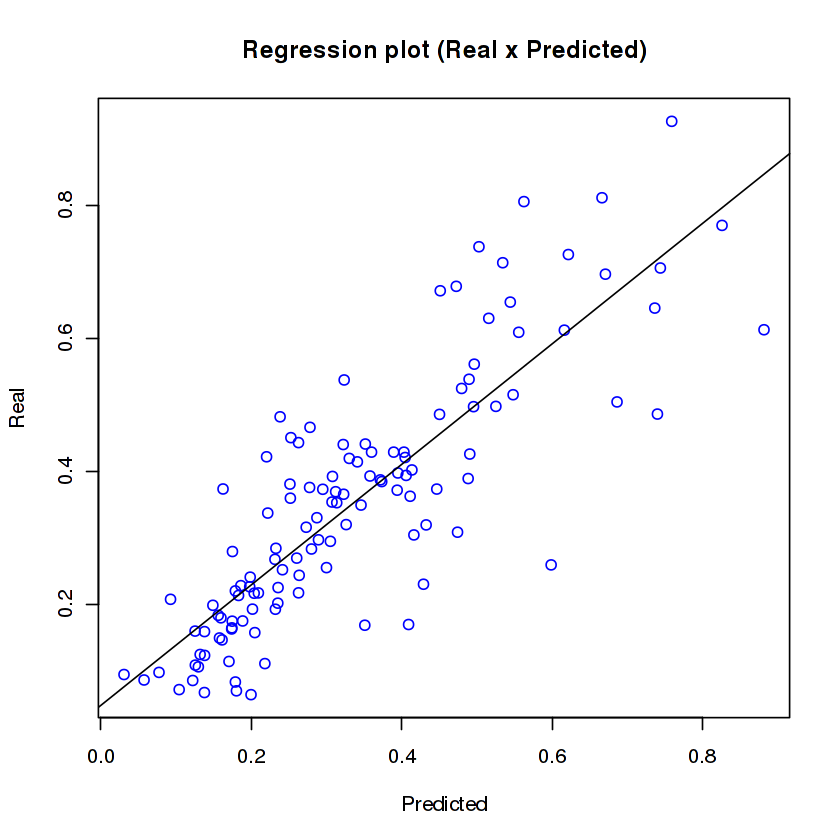

In [76]:
plot(neural_predicted_reduced, test_set_reduced[,5], col = "blue",xlab = "Predicted", ylab = "Real", main = "Regression plot (Real x Predicted)")
abline(lm(test_set_reduced[,5] ~ neural_predicted_reduced))

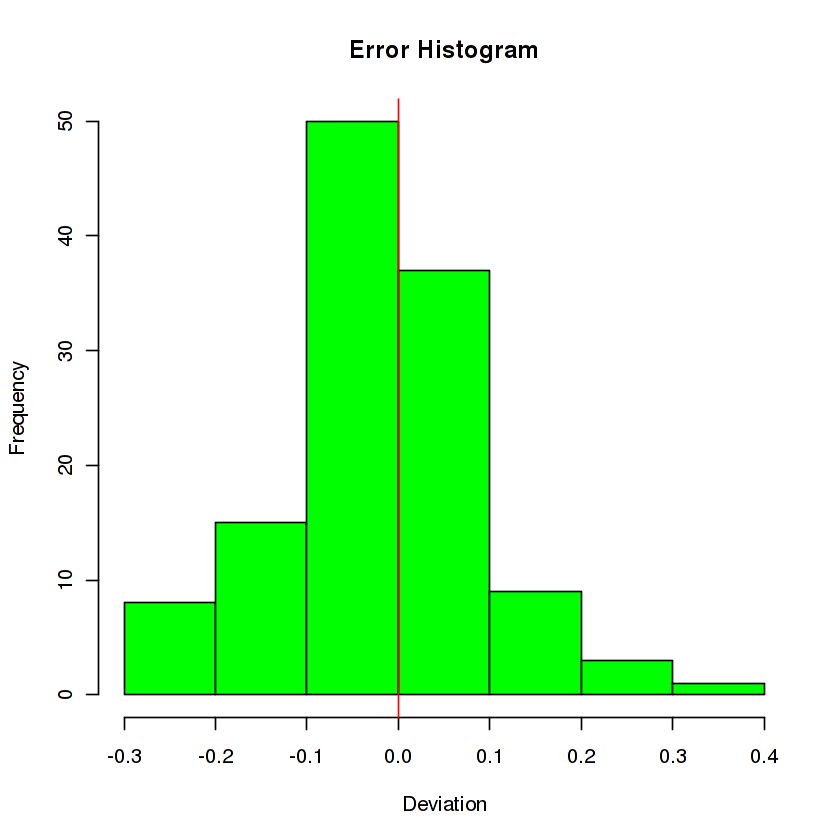

In [77]:
# Let's plot a histogram to see the distribution of the deviations
hist(neural_predicted_reduced -  test_set_reduced[,5], main = "Error Histogram", col = "green", xlab = "Deviation")
abline(v = 0, col = "red")

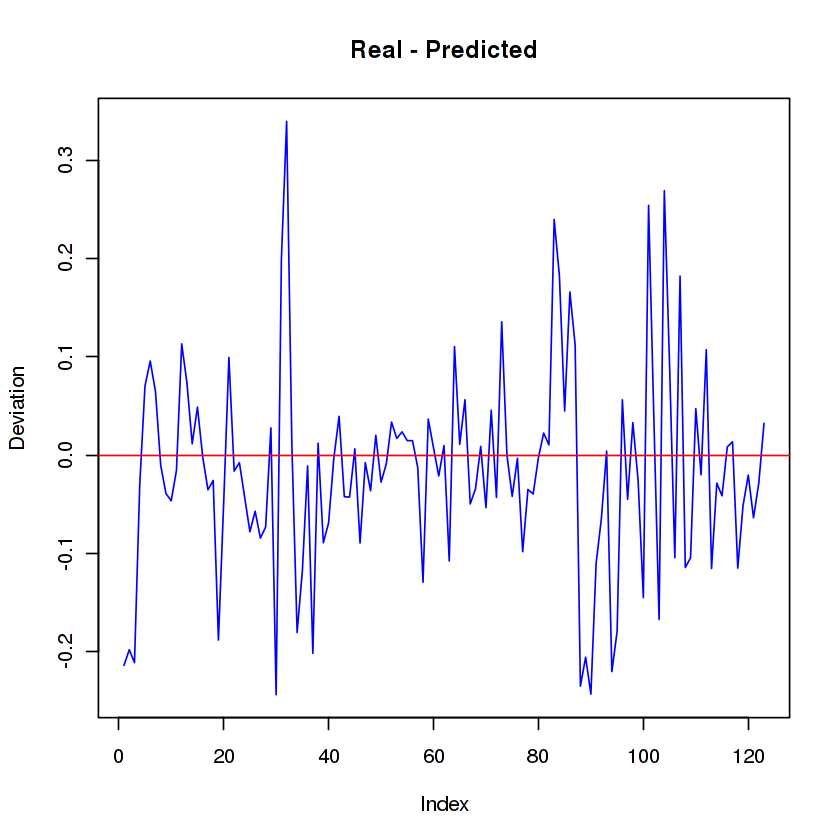

In [81]:
# Deviation plot
plot(neural_predicted_reduced -  test_set_reduced[,5], type = "l", col = "blue", xlab = "Index", ylab = "Residuals", main = "Real - Predicted")
abline(h = 0, col = "red")

In [78]:
# Measuring the performance of the neural model 
errors_neural_model <- performance(test_set_reduced[,5],neural_predicted_reduced)
errors_neural_model

RMSE,MAPE,SSE,R
0.1058779565,26.95812938,1.378847426,0.8406483608


In [82]:
# Seemingly the neural model performed better than the linear one, because have reached lower values for RMSE, MAPE and SSE and
# greater value for R. Furthermore, the residuals plots show lower variance for the neural model and We can still see that 
# The histogram for the residuls of the neural model have more values near the vertical line = 0
# We could still have applied cross validation and other techniques to assure this
# Besides that, this is not the best way to train and test a neural net. Apart from the optimizing algorithm,
# We could have used a lot of combinations of the number of hidden layers and neurons. This could be done
# running a for loop for example

# One solution to this limitation would be using a genetic algorithm in which We would have the chromossomes with the weights 
# of the network and so We could find the best chromossome that would minimize our error function